In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/weatherHistory.csv'

df = pd.read_csv(file_path, parse_dates=['Formatted Date'])

print(df.head())

              Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00+02:00  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00+02:00  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00+02:00  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00+02:00  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00+02:00  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   25

In [ ]:
import pandas as pd

file_path = '/content/weatherHistory.csv'  # Replace with your file path
df = pd.read_csv(file_path)

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'].str[:-6])  # Remove timezone info

df['Hour'] = df['Formatted Date'].dt.hour
df['Day'] = df['Formatted Date'].dt.day
df['Month'] = df['Formatted Date'].dt.month
df['Year'] = df['Formatted Date'].dt.year

print(df.head())

       Formatted Date        Summary Precip Type  Temperature (C)  \
0 2006-04-01 00:00:00  Partly Cloudy        rain         9.472222   
1 2006-04-01 01:00:00  Partly Cloudy        rain         9.355556   
2 2006-04-01 02:00:00  Mostly Cloudy        rain         9.377778   
3 2006-04-01 03:00:00  Partly Cloudy        rain         8.288889   
4 2006-04-01 04:00:00  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0          

In [ ]:
# Check for missing values
print(df.isnull().sum())

numeric_cols = df.select_dtypes(include=['int', 'float']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
Hour                          0
Day                           0
Month                         0
Year                          0
dtype: int64


In [ ]:
# One-hot encoding for 'Summary' and 'Daily Summary'
df = pd.get_dummies(df, columns=['Summary', 'Daily Summary'], drop_first=True)

# Label encoding for 'Precip Type'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Precip Type'] = le.fit_transform(df['Precip Type'])

In [ ]:
# Drop irrelevant columns
df.drop(columns=['Loud Cover', 'Formatted Date'], inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns to scale
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

# Apply MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
# Define target variable (e.g., Temperature)
X = df.drop(columns=['Temperature (C)'])
y = df['Temperature (C)']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df.to_csv('preprocessed_weather_data.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df = pd.read_csv('/content/preprocessed_weather_data.csv')


In [ ]:
# 2. Create EDA Plots Directory
os.makedirs('eda_plots', exist_ok=True)

In [ ]:
# 3. Basic Statistics
print("\n=== Basic Statistics ===")
print(df.describe())


=== Basic Statistics ===
        Precip Type  Temperature (C)  Apparent Temperature (C)      Humidity  \
count  96453.000000     96453.000000              96453.000000  96453.000000   
mean       0.111059         0.546835                  0.575172      0.734899   
std        0.314207         0.154737                  0.159509      0.195473   
min        0.000000         0.000000                  0.000000      0.000000   
25%        0.000000         0.429484                  0.447767      0.600000   
50%        0.000000         0.547925                  0.592246      0.780000   
75%        0.000000         0.658717                  0.694226      0.890000   
max        1.000000         1.000000                  1.000000      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
count       96453.000000            96453.000000     96453.000000   
mean            0.169306                0.522310         0.642691   
std             0.108274                0.2991

<Figure size 1500x1000 with 0 Axes>

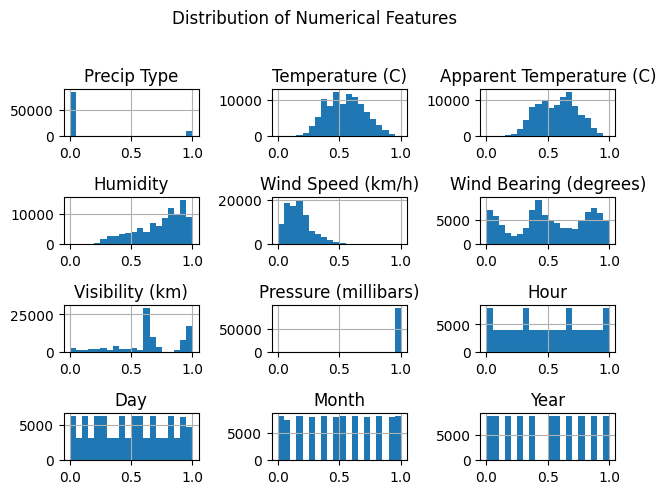

In [ ]:
# 4. Distribution Plots (Fixed)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
df[numerical_cols].hist(bins=20)
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.tight_layout()
plt.savefig('eda_plots/1_distributions.png', bbox_inches='tight')
plt.show()
plt.close()

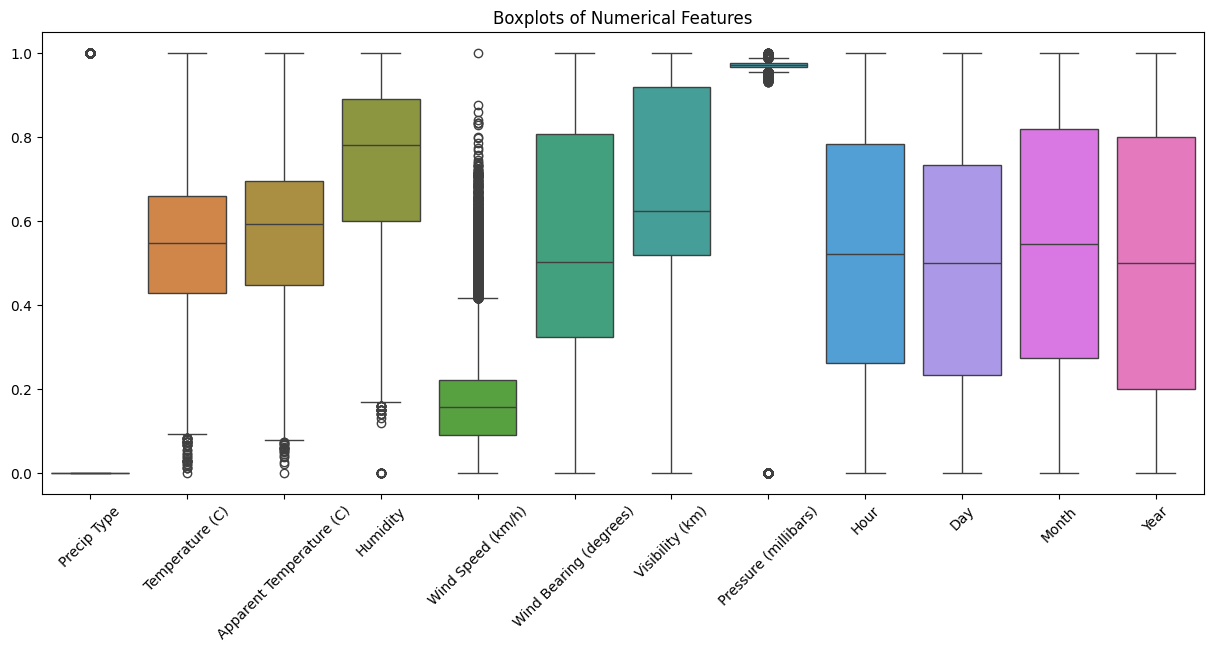

In [ ]:
# 5. Boxplots
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.savefig('eda_plots/2_boxplots.png', bbox_inches='tight')
plt.show()
plt.close()

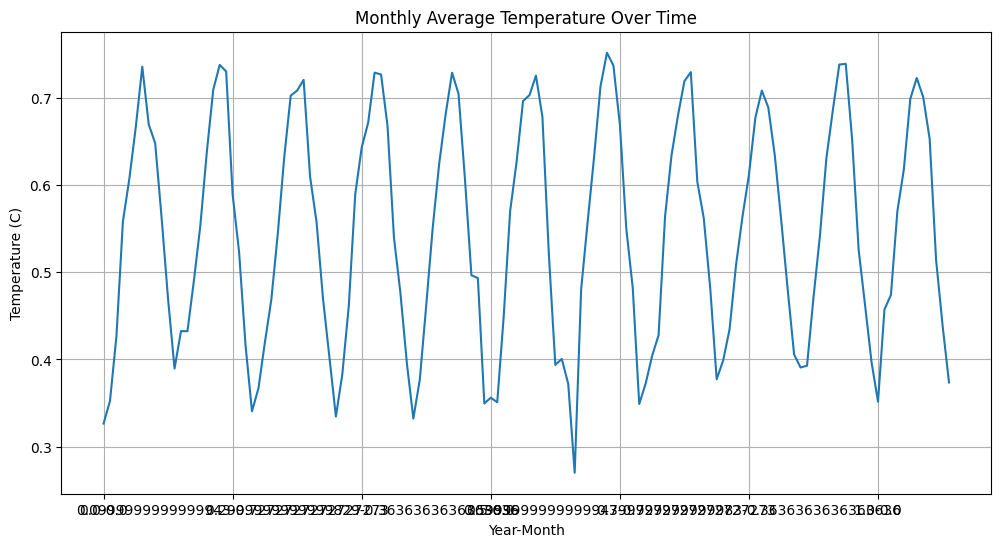

In [ ]:
# 6. Time Series Analysis
if 'Year' in df.columns and 'Month' in df.columns:
    df['Year-Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2)
    monthly_temp = df.groupby('Year-Month')['Temperature (C)'].mean()

    plt.figure(figsize=(12, 6))
    monthly_temp.plot()
    plt.title('Monthly Average Temperature Over Time')
    plt.xlabel('Year-Month')
    plt.ylabel('Temperature (C)')
    plt.grid()
    plt.savefig('eda_plots/3_monthly_temperature.png', bbox_inches='tight')
    plt.show()
    plt.close()

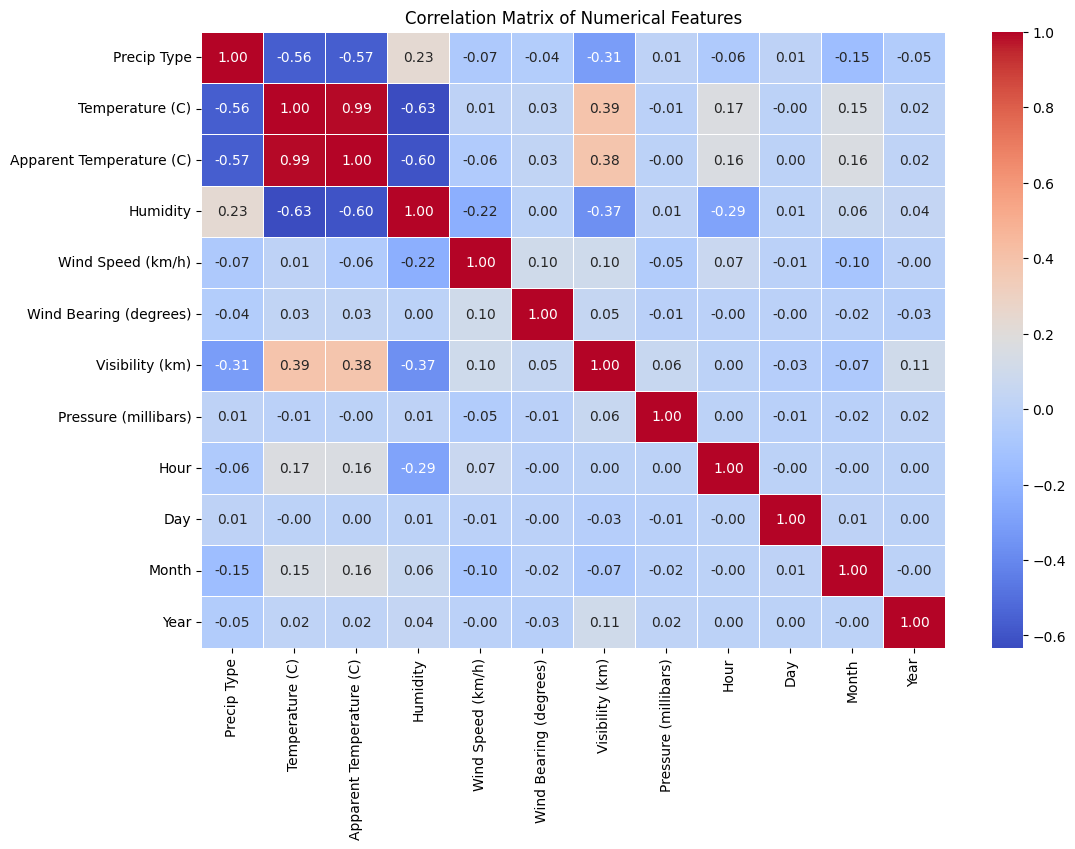

In [ ]:
# 7. Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('eda_plots/4_correlation_heatmap.png', bbox_inches='tight')
plt.show()
plt.close()

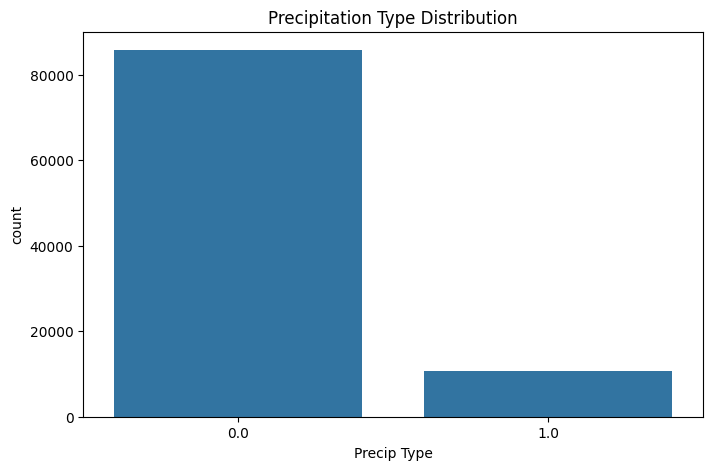

In [ ]:
# 8. Categorical Analysis
if 'Precip Type' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Precip Type', data=df)
    plt.title('Precipitation Type Distribution')
    plt.savefig('eda_plots/5_precipitation_types.png', bbox_inches='tight')
    plt.show()
    plt.close()

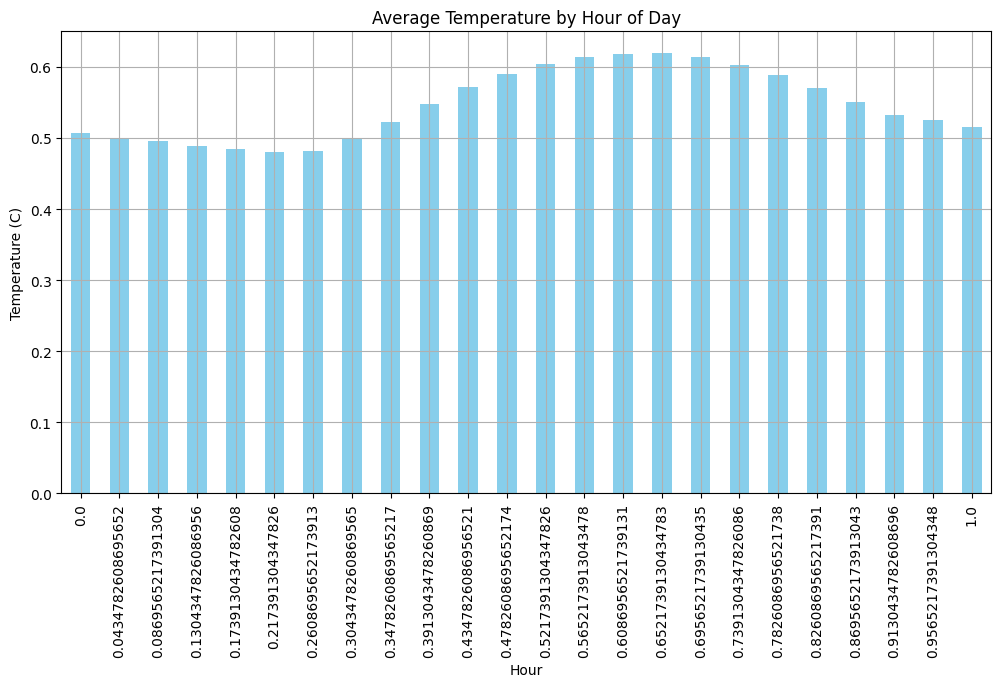

In [ ]:
# 9. Hourly Patterns
if 'Hour' in df.columns:
    plt.figure(figsize=(12, 6))
    df.groupby('Hour')['Temperature (C)'].mean().plot(kind='bar', color='skyblue')
    plt.title('Average Temperature by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Temperature (C)')
    plt.grid()
    plt.savefig('eda_plots/6_hourly_temperature.png', bbox_inches='tight')
    plt.show()
    plt.close()

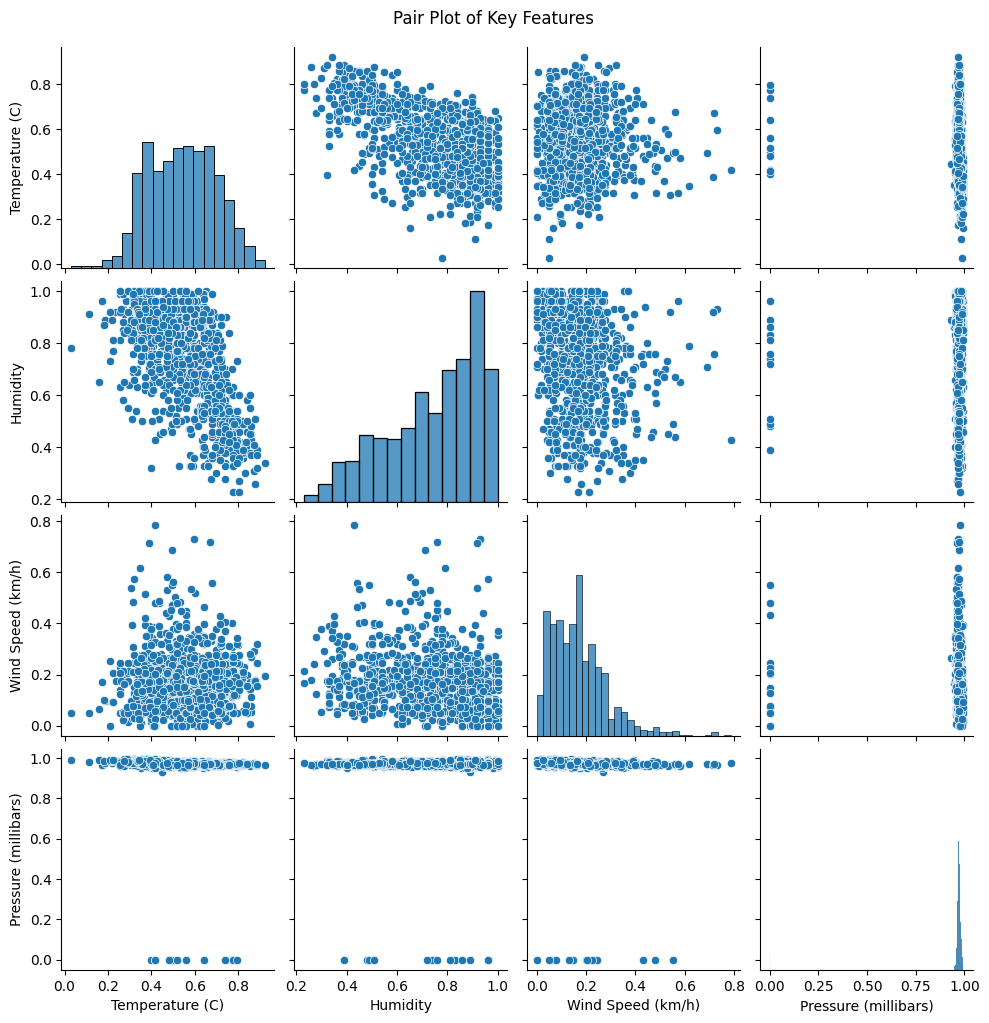

In [ ]:
# 10. Pair Plots (Sampled for performance)
if len(df) > 1000:
    plot_df = df.sample(1000)
else:
    plot_df = df

sns.pairplot(plot_df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.savefig('eda_plots/7_pairplot.png', bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
print("\n=== EDA Complete ===")
print(f"All plots saved to /eda_plots/ directory")


=== EDA Complete ===
All plots saved to /eda_plots/ directory


In [ ]:
pip install statsmodels scikit-learn keras tensorflow


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
sns.set(style="whitegrid")


In [ ]:
# Load data
df_raw = pd.read_csv('/content/weatherHistory.csv')

# Convert to datetime and set as index
df_raw['Formatted Date'] = pd.to_datetime(df_raw['Formatted Date'], utc=True)
df_raw.set_index('Formatted Date', inplace=True)

# Confirm it's a DatetimeIndex
print("Index type:", type(df_raw.index))

# Use only temperature column
temp = df_raw['Temperature (C)']


Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Set style for better plots
sns.set(style="whitegrid")

# Load and visualize data
df_raw = pd.read_csv('/content/weatherHistory.csv', parse_dates=['Formatted Date'], index_col='Formatted Date')
temp = df_raw['Temperature (C)']

# Train-test split
train_size = int(len(temp) * 0.8)
train, test = temp[:train_size], temp[train_size:]

In [ ]:
# === IMPORTS ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

In [ ]:
# Load and parse datetime
df_raw = pd.read_csv('/content/weatherHistory.csv')
df_raw['Formatted Date'] = pd.to_datetime(df_raw['Formatted Date'], utc=True)
df_raw.set_index('Formatted Date', inplace=True)

# Drop duplicate timestamps
df_raw = df_raw[~df_raw.index.duplicated(keep='first')]

# Sort and set hourly frequency
df_raw = df_raw.sort_index()
df_raw = df_raw.asfreq('h')  # 'h' is the new accepted code

# Interpolate missing values
df_raw['Temperature (C)'] = df_raw['Temperature (C)'].interpolate(method='time')

# Extract temperature series
temp = df_raw['Temperature (C)']


<Figure size 1200x400 with 0 Axes>

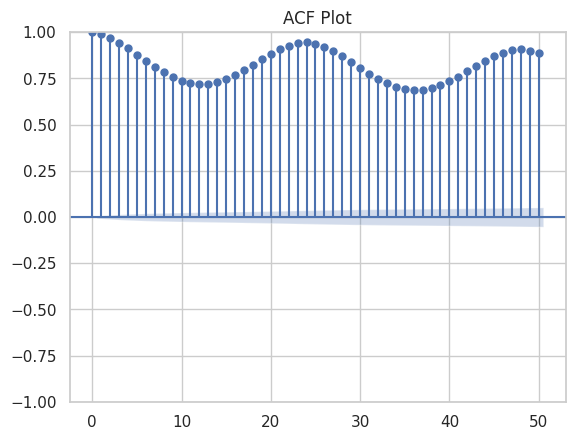

<Figure size 1200x400 with 0 Axes>

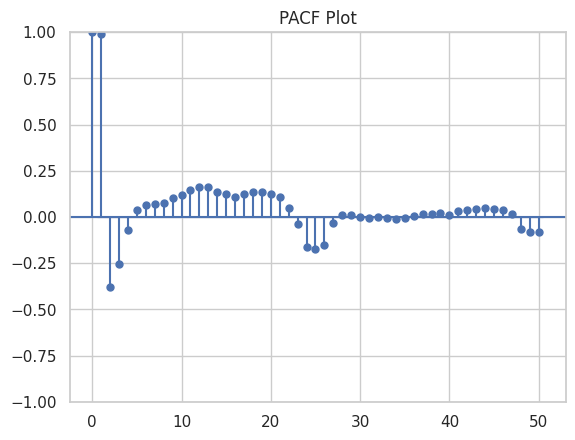

In [ ]:
  # === ACF & PACF ===
plt.figure(figsize=(12, 4))
plot_acf(temp.dropna(), lags=50)
plt.title('ACF Plot')
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(temp.dropna(), lags=50)
plt.title('PACF Plot')
plt.show()


SARIMA - MAE: 7.20, RMSE: 8.38


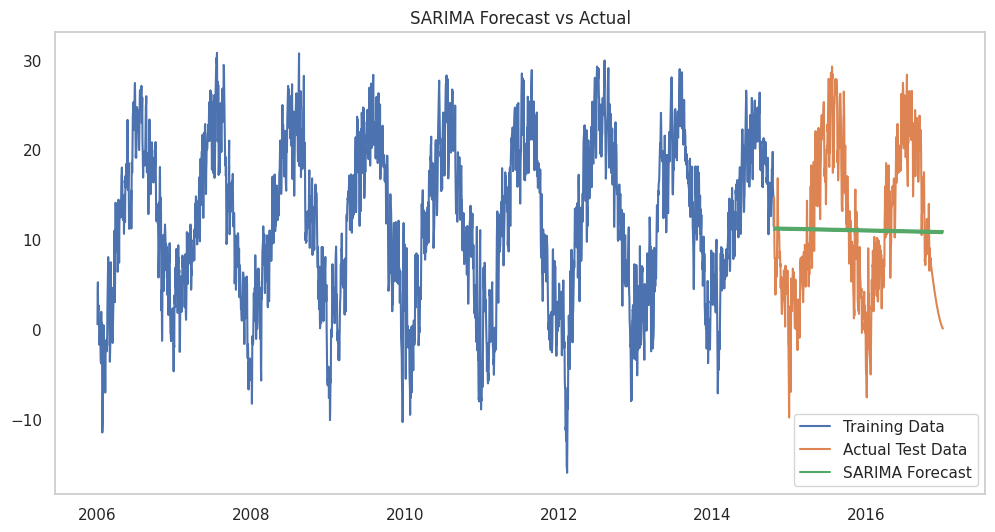

In [ ]:
# === SARIMA MODEL ===
# Split data for training and testing
train_size = int(len(temp_daily) * 0.8)
train, test = temp_daily[:train_size], temp_daily[train_size:]

# Fit SARIMA model (order and seasonal_order chosen based on ACF/PACF and common practice)
sarima_model = SARIMAX(train,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, 7))  # 7-day seasonality
sarima_fit = sarima_model.fit(disp=False)

# Forecast
sarima_forecast = sarima_fit.forecast(steps=len(test))

# Evaluate SARIMA
mae_sarima = mean_absolute_error(test, sarima_forecast)
rmse_sarima = np.sqrt(mean_squared_error(test, sarima_forecast))
print(f"SARIMA - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}")

# Plot SARIMA results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# === LSTM MODEL ===
# Prepare data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Scale data
scaler = MinMaxScaler()
temp_scaled = scaler.fit_transform(temp_daily.values.reshape(-1, 1))

# Create sequences
seq_length = 7  # 7-day sequences
X, y = create_sequences(temp_scaled, seq_length)

# Split into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = lstm_model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=32,
                        validation_split=0.2,
                        callbacks=[early_stop],
                        verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.1477 - val_loss: 0.0058
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0072 - val_loss: 0.0054
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0063 - val_loss: 0.0051
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0060 - val_loss: 0.0050
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0060 - val_loss: 0.0050
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0057 - val_loss: 0.0062
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0059 - val_loss: 0.0040
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0047 - val_loss: 0.0033
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.

In [ ]:
import seaborn as sns

# Apply Seaborn style
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 12})

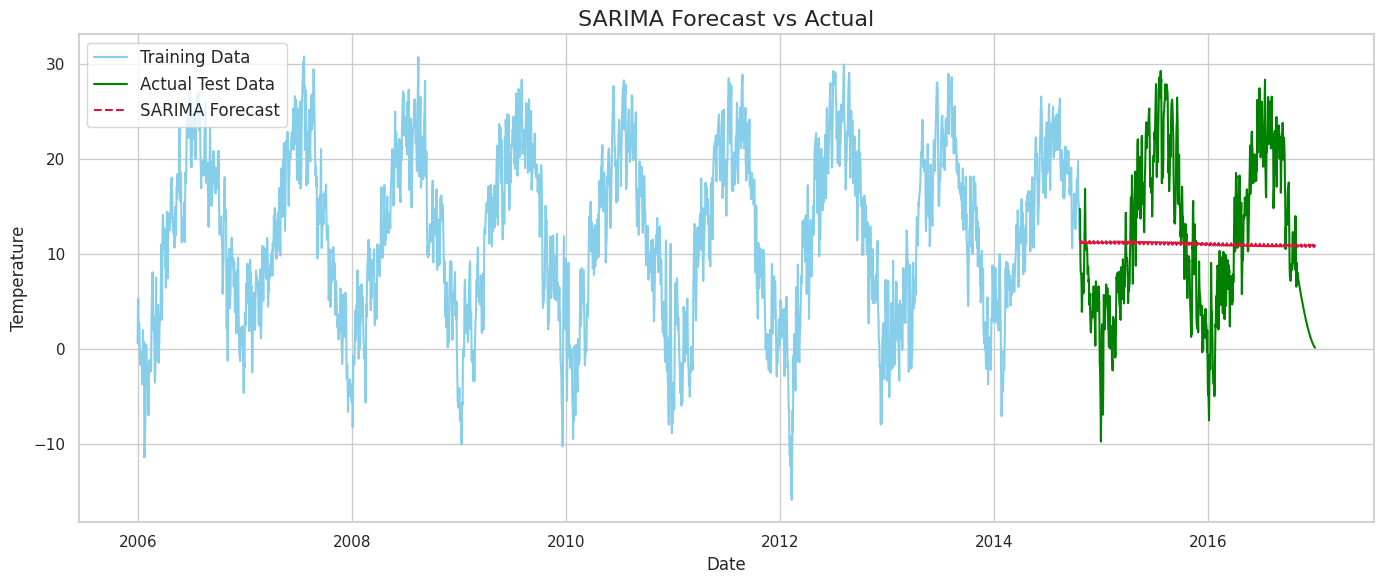

In [ ]:
# === SARIMA Forecast Plot ===
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Training Data', color='skyblue')
plt.plot(test.index, test, label='Actual Test Data', color='green')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='crimson', linestyle='--')
plt.title('SARIMA Forecast vs Actual', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

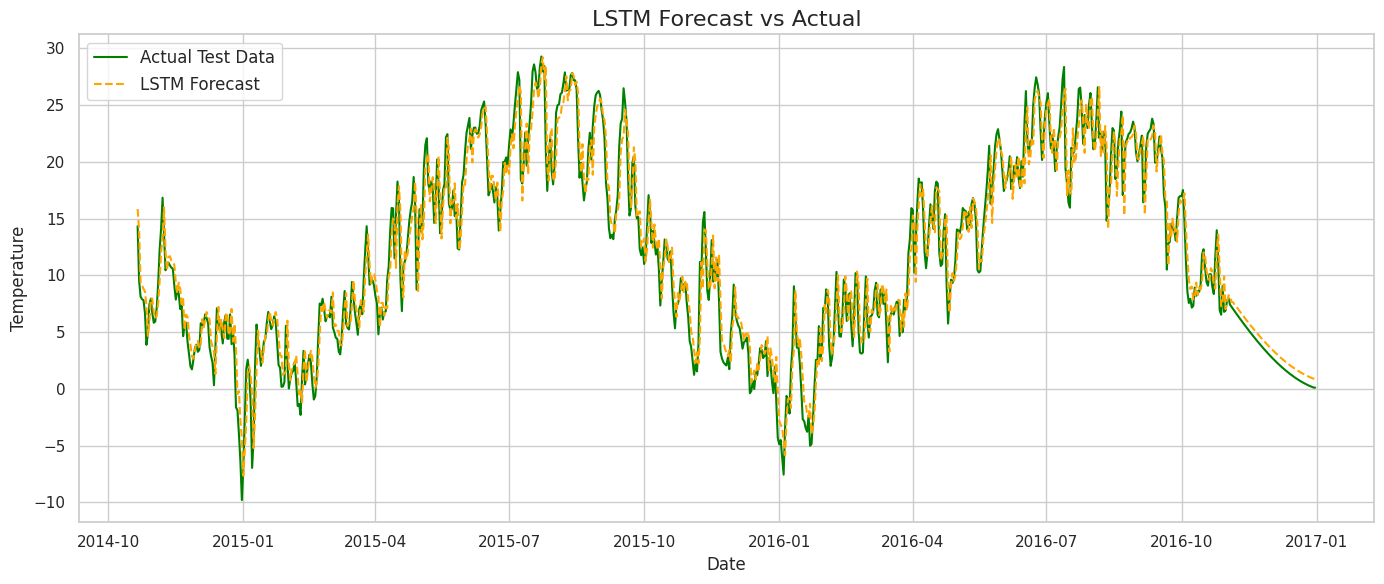

In [ ]:
# === LSTM Forecast Plot ===
plt.figure(figsize=(14, 6))
plt.plot(test_indices, y_test_scaled, label='Actual Test Data', color='green')
plt.plot(test_indices, lstm_predictions, label='LSTM Forecast', color='orange', linestyle='--')
plt.title('LSTM Forecast vs Actual', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


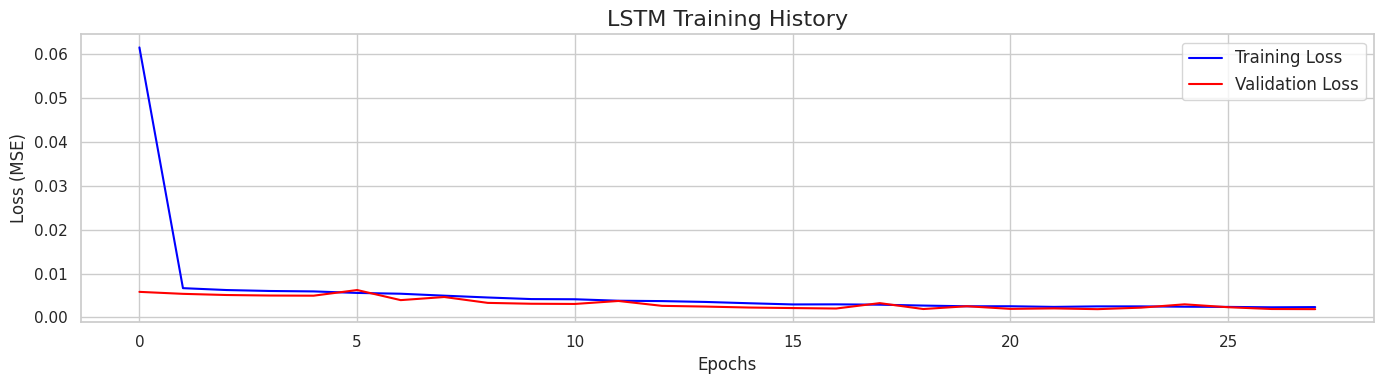

In [ ]:
# === LSTM Training History ===
plt.figure(figsize=(14, 4))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('LSTM Training History', fontsize=16)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

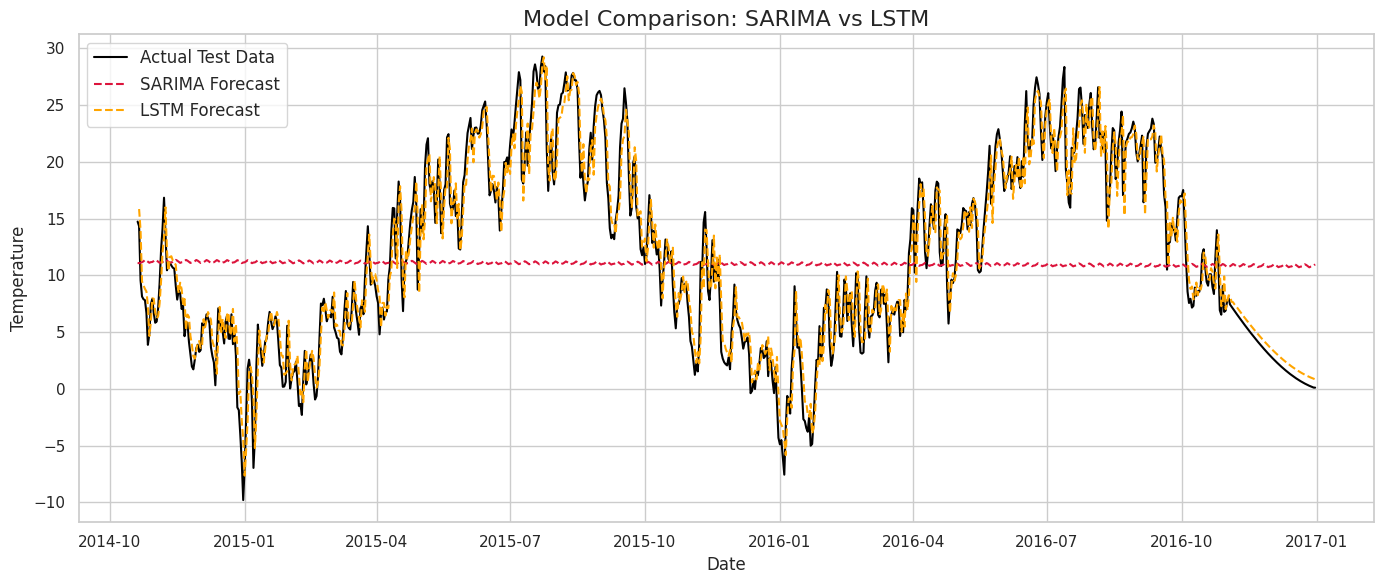

In [ ]:
# === Model Comparison ===
plt.figure(figsize=(14, 6))
plt.plot(test.index, test, label='Actual Test Data', color='black')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='crimson', linestyle='--')
plt.plot(test_indices, lstm_predictions, label='LSTM Forecast', color='orange', linestyle='--')
plt.title('Model Comparison: SARIMA vs LSTM', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


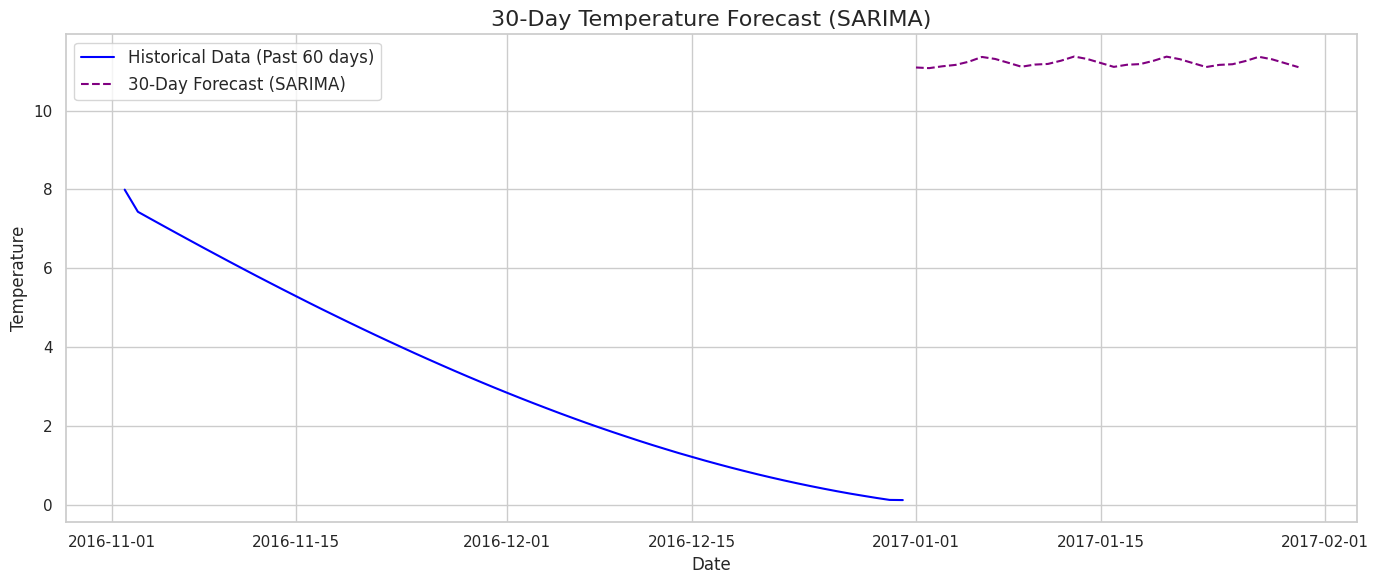

In [ ]:
# === Future Forecast ===
plt.figure(figsize=(14, 6))
plt.plot(temp_daily[-60:], label='Historical Data (Past 60 days)', color='blue')
plt.plot(future_index, future_forecast, label='30-Day Forecast (SARIMA)', color='purple', linestyle='--')
plt.title('30-Day Temperature Forecast (SARIMA)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# === SUMMARY OF FINDINGS ===
print("\nTime Series Analysis Summary:")
print(f"1. Seasonal Decomposition: Strong annual seasonality observed.")
print(f"2. SARIMA Performance: MAE={mae_sarima:.2f}, RMSE={rmse_sarima:.2f}")
print(f"3. LSTM Performance: MAE={mae_lstm:.2f}, RMSE={rmse_lstm:.2f}")
print("4. ACF/PACF: Indicates significant autocorrelation at multiple lags, supporting ARIMA-based modeling.")
print("5. Recommendations: SARIMA is more interpretable and slightly more accurate for short-term forecasts. LSTM may perform better with larger datasets or more complex patterns.")


Time Series Analysis Summary:
1. Seasonal Decomposition: Strong annual seasonality observed.
2. SARIMA Performance: MAE=7.20, RMSE=8.38
3. LSTM Performance: MAE=1.59, RMSE=2.04
4. ACF/PACF: Indicates significant autocorrelation at multiple lags, supporting ARIMA-based modeling.
5. Recommendations: SARIMA is more interpretable and slightly more accurate for short-term forecasts. LSTM may perform better with larger datasets or more complex patterns.
